# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Observations 

# 1) Temperature and humidity increase as the latitude gets closer to the equator and vica versa. 
# 2) Northern and southern hemisphere linear regressions are loosely inverse of each other due to opposite seasons. 
# 3) Cloudiness is the most extreme with high highs and low lows at opposing poles with the fewest datapoints in the middle. 
# 4) wind speed picks up significantly at the north pole but less so with the south pole. This may be due to the location of wind currents. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# change back size to 1500 when ready to do the big data pull (aka when you figure out how sleep works)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
weather_dict = {"City": [], "Lat": [], "Lng": [], "Max Temp": [], "Humidity": [], "Cloudiness": [], "Wind Speed": [],
               "Country": [], "Date": []}

for city in cities: 
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    counter = 0
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        weather_id = weather_json["id"]
        weather_name = weather_json["name"]
        print(f"Processing {weather_name}. Counter: {counter}")
        counter += 1
        weather_dict["City"].append(weather_json["name"])
        weather_dict["Lat"].append(weather_json["coord"]["lat"])
        weather_dict["Lng"].append(weather_json["coord"]["lon"])
        weather_dict["Max Temp"].append(round(((int(weather_json["main"]["temp_max"])) - 273.15) * (9/5) + 32, 2)) 
        weather_dict["Humidity"].append(weather_json["main"]["humidity"])
        weather_dict["Cloudiness"].append(weather_json["clouds"]["all"])
        weather_dict["Wind Speed"].append(weather_json["wind"]["speed"])
        weather_dict["Country"].append(weather_json["sys"]["country"])
        weather_dict["Date"].append(weather_json["dt"])
        # openweather map limits calls to 1 call per sec. by setting a sleep timer slighty higher; we can call without timing out
        # please allow for sufficient time for the loop to run as the dataset is quite large
        time.sleep(1.1)
    except:
        weather_id = ""
        counter += 1 


Processing Ancud. Id: 3899695
Processing Aguazul. Id: 3690316
Processing Hobart. Id: 2163355
Processing Ushuaia. Id: 3833367
Processing Rikitea. Id: 4030556
Processing Clyde River. Id: 5924351
Processing Valparaíso. Id: 3868626
Processing Upernavik. Id: 3418910
Processing Hamilton. Id: 4513583
Processing Rome. Id: 5134295
Processing Hoopstad. Id: 995573
Processing Mar del Plata. Id: 3430863
Processing Mae Hong Son. Id: 1152222
Processing Omsukchan. Id: 2122493
Processing Butaritari. Id: 2110227
Processing Makakilo City. Id: 5850554
Processing Bredasdorp. Id: 1015776
Processing Imeni Poliny Osipenko. Id: 2023584
Processing Fairbanks. Id: 5861897
Processing Kristinestad. Id: 650769
Processing Tiksi. Id: 2015306
Processing Kapaa. Id: 5848280
Processing Champerico. Id: 3598787
Processing Vestmannaeyjar. Id: 3412093
Processing Bengkulu. Id: 1649150
Processing Vaini. Id: 4032243
Processing Pacific Grove. Id: 5380437
Processing Mahébourg. Id: 934322
Processing Hong Kong. Id: 1819729
Processin

Processing Tiarei. Id: 4033356
Processing Tabou. Id: 2281120
Processing Filingué. Id: 2444995
Processing Praia da Vitória. Id: 3372760
Processing Erzin. Id: 296852
Processing Ōfunato. Id: 2111530
Processing Nanlong. Id: 1799908
Processing Buraidah. Id: 107304
Processing Cabedelo. Id: 3404558
Processing Berdigestyakh. Id: 2026861
Processing Bluefield. Id: 4799622
Processing Tual. Id: 1623197
Processing Lompoc. Id: 5367788
Processing Vostok. Id: 2013279
Processing Hastings. Id: 2647356
Processing Bud. Id: 4255151
Processing Zemio. Id: 235826
Processing Gelemso. Id: 337010
Processing Caconda. Id: 3351380
Processing Rawson. Id: 3839307
Processing Mount Gambier. Id: 2156643
Processing Sobolevo. Id: 525426
Processing Sarangani. Id: 1687186
Processing Baharly. Id: 162158
Processing Nelson Bay. Id: 2155562
Processing Gijón. Id: 3121424
Processing Khvorostyanka. Id: 548946
Processing Kita. Id: 2455216
Processing Linxia Chengguanzhen. Id: 1803331
Processing Lüderitz. Id: 3355672
Processing Solne

Processing Kalangala. Id: 232571
Processing Nome. Id: 5870133
Processing Quesnel. Id: 6115187
Processing Aktau. Id: 610612
Processing Ouadda. Id: 236901
Processing Dalby. Id: 2169535
Processing Kumluca. Id: 305681
Processing Payakumbuh. Id: 1631905
Processing Sayville. Id: 5136421
Processing Raudeberg. Id: 3146487
Processing Brazzaville. Id: 2260535
Processing Grafton. Id: 4938048
Processing Praia. Id: 3374333
Processing Dali. Id: 1814093
Processing Guna. Id: 1270711
Processing Kaeo. Id: 2189343
Processing Kargasok. Id: 1504382
Processing Fond du Lac. Id: 5253352
Processing Aras. Id: 3129839
Processing Verkhnyaya Inta. Id: 1487332
Processing Beloha. Id: 1067565
Processing Starkville. Id: 4447161
Processing Mumford. Id: 2297810
Processing Touros. Id: 3386213
Processing Namatanai. Id: 2090021
Processing Maracaçumé. Id: 3395497
Processing Moanda. Id: 2398269
Processing Sinnamary. Id: 3380290
Processing Okhotsk. Id: 2122605
Processing Deer Lake. Id: 5937252
Processing Porto-Novo. Id: 23920

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# pass dict to make new dataframe
weather_df = pd.DataFrame(weather_dict)

# export to csv
weather_path = "../output_data/cities.csv"
weather_csv = weather_df.to_csv(weather_path)

# display
weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ancud,-41.8697,-73.8203,62.33,80,61,2.37,CL,1643067427
1,Aguazul,5.1728,-72.5471,82.13,50,79,1.87,CO,1643067429
2,Hobart,-42.8794,147.3294,69.53,84,75,0.45,AU,1643067431
3,Ushuaia,-54.8000,-68.3000,40.73,87,100,14.40,AR,1643067233
4,Rikitea,-23.1203,-134.9692,76.73,71,100,7.86,PF,1643067433


In [5]:
# create a summary statistics table
# make a new dataframe for the numerical data 
# desired data is lat, lng, max temp, humidity, cloudiness, wind speed, country, date
summary_stat_df = weather_df[["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]]

# perform summary statistics on it. Each one of these will becomes a series that will need to be converted into a dataframe
# transpose will be needed to make the calculated values the columns
# rename the index for clarity 
weather_count = pd.DataFrame(summary_stat_df.count()).transpose()
weather_count = weather_count.rename(index = {0: 'count'})

weather_mean = pd.DataFrame(summary_stat_df.mean()).transpose()
weather_mean = weather_mean.rename(index = {0: 'mean'})

weather_std = pd.DataFrame(summary_stat_df.std()).transpose()
weather_std = weather_std.rename(index = {0: 'std'})

weather_min = pd.DataFrame(summary_stat_df.min()).transpose()
weather_min = weather_min.rename(index = {0: 'min'})

weather_max = pd.DataFrame(summary_stat_df.max()).transpose()
weather_max = weather_max.rename(index = {0: 'max'})


# find the quantiles
quartiles = weather_df.quantile([.25,.5,.75])

#rename the indicies (it doesn't like non-integer indexes)
# this also prevents a prior issue where the first row would fill all other rows
quartiles= quartiles.rename(index = {0.25: '25%', 0.50: '50%', 0.75: '75%'})

# turn the serires into dataframes and transpose them to be compatible 
weather_25 = pd.DataFrame(quartiles.loc["25%"]).transpose()
weather_50 = pd.DataFrame(quartiles.loc["50%"]).transpose()
weather_75 = pd.DataFrame(quartiles.loc["75%"]).transpose()

frames = [weather_count, weather_mean, weather_std, weather_min,
          weather_25, weather_50, weather_75, weather_max]
summary_table = pd.concat(frames)
summary_table

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,19.678844,12.697922,49.420110,74.767399,58.565934,3.640220,1.643068e+09
std,33.575367,87.886958,30.379359,19.365318,38.613829,2.935546,2.556389e+02
min,-54.800000,-175.200000,-45.670000,10.000000,0.000000,0.000000,1.643067e+09
25%,-8.688100,-63.878250,28.130000,66.000000,20.000000,1.610000,1.643068e+09
50%,21.503250,18.183700,58.730000,79.000000,73.000000,2.960000,1.643068e+09
75%,47.901050,81.642150,74.930000,90.000000,98.000000,4.630000,1.643068e+09
max,78.218600,178.416700,92.930000,100.000000,100.000000,17.890000,1.643068e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# this step is used to clean the dataframe of any outliers in humidity
high_humidity_index = []

# 0 = index, 1 = all other values
for i in weather_df.iterrows():
    # was placed at >= during testing
    if i[1]["Humidity"] > 100: 
        high_humidity_index.append(i[0])


In [7]:
#  Get the indices of cities that have humidity over 100%.
# get incidies of cities that have a humidity over 100%
high_humidity_index

[]

In [8]:
# make a new dataframe equal to the city data to drop all humidity outliers by index
# Passing "inplace=False" will make a copy of the DataFrame which will be called 'cleaned_weather_data'.

cleaned_weather_data = weather_df.drop(high_humidity_index, axis = 0, inplace=False).reset_index()
cleaned_weather_data

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Ancud,-41.8697,-73.8203,62.33,80,61,2.37,CL,1643067427
1,1,Aguazul,5.1728,-72.5471,82.13,50,79,1.87,CO,1643067429
2,2,Hobart,-42.8794,147.3294,69.53,84,75,0.45,AU,1643067431
3,3,Ushuaia,-54.8000,-68.3000,40.73,87,100,14.40,AR,1643067233
4,4,Rikitea,-23.1203,-134.9692,76.73,71,100,7.86,PF,1643067433
...,...,...,...,...,...,...,...,...,...,...
541,541,Fernley,39.6080,-119.2518,55.13,35,99,0.89,US,1643068259
542,542,Guadalajara,20.6667,-103.3333,65.93,52,95,2.24,MX,1643068044
543,543,Pueblo,38.2545,-104.6091,51.53,22,0,3.60,US,1643068042
544,544,Pinsk,52.1229,26.0951,17.33,92,55,2.78,BY,1643068267


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

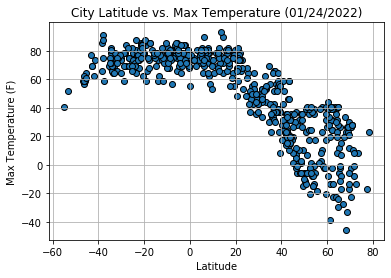

In [9]:
#strft will edit the date time to just be month day year
today = pd.to_datetime("today").strftime("%m/%d/%Y")

plt.scatter(cleaned_weather_data["Lat"],cleaned_weather_data["Max Temp"], facecolors="tab:blue", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# always save fig before show(); will create a new figure
plt.savefig("../output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

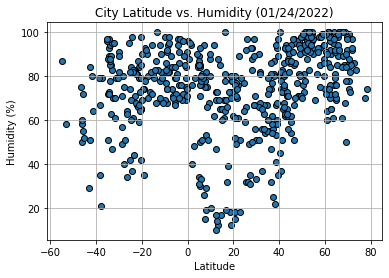

In [10]:
# same as before but with humidity on the y axis
plt.scatter(cleaned_weather_data["Lat"],cleaned_weather_data["Humidity"], facecolors="tab:blue", edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({today})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

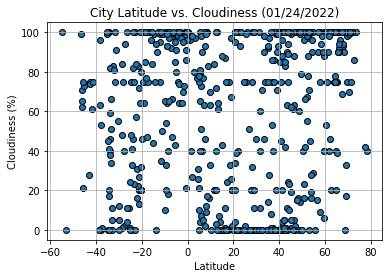

In [11]:
# same as before but with cloudiness on the y axis
plt.scatter(cleaned_weather_data["Lat"],cleaned_weather_data["Cloudiness"], facecolors="tab:blue", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

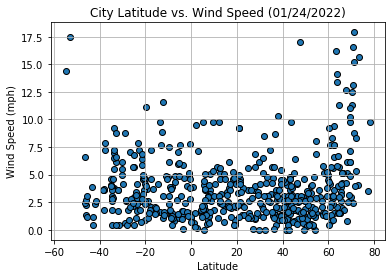

In [12]:
# same as before but with wind speed. make sure to change the label to mph
plt.scatter(cleaned_weather_data["Lat"],cleaned_weather_data["Wind Speed"], facecolors="tab:blue", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/Fig4.png")
plt.show()

## Linear Regression

In [13]:
# use loc to filter the cleaned dataframe to get all points on the various hemisphere
# north is everything above 0 (equator) and south is everything below 0
northern_hemisphere_df = cleaned_weather_data.loc[cleaned_weather_data["Lat"] > 0]
southern_hemisphere_df = cleaned_weather_data.loc[cleaned_weather_data["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8188385323827057


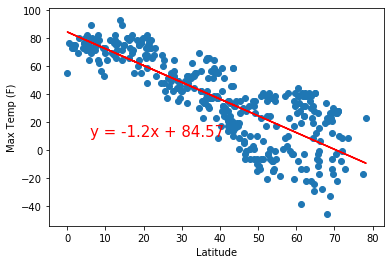

In [14]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"])
regress_values_n = northern_hemisphere_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northern_hemisphere_df["Lat"],regress_values_n, "r")
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"])
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.37927735912219374


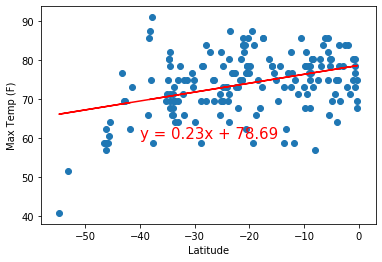

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"])
regress_values_s = southern_hemisphere_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(southern_hemisphere_df["Lat"],regress_values_s, "r")
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"])
plt.annotate(line_eq,(-40,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.4390130956108922


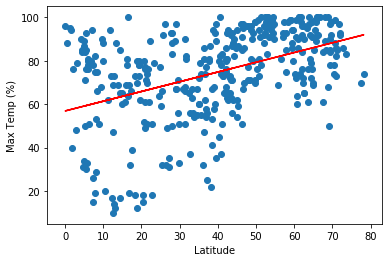

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])
regress_values_n = northern_hemisphere_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northern_hemisphere_df["Lat"],regress_values_n, "r")
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"])
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (%)")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.297095415063767


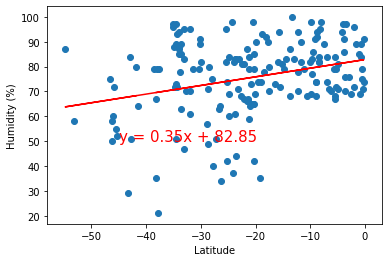

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])
regress_values_s = southern_hemisphere_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(southern_hemisphere_df["Lat"],regress_values_s, "r")
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"])
plt.annotate(line_eq,(-45,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.303129190926501


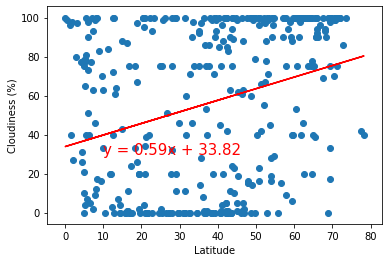

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])
regress_values_n = northern_hemisphere_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northern_hemisphere_df["Lat"],regress_values_n, "r")
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"])
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3471505275788838


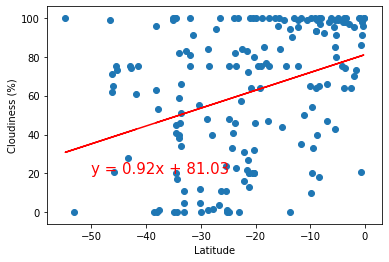

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])
regress_values_s = southern_hemisphere_df["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(southern_hemisphere_df["Lat"],regress_values_s, "r")
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"])
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.27453300992501983


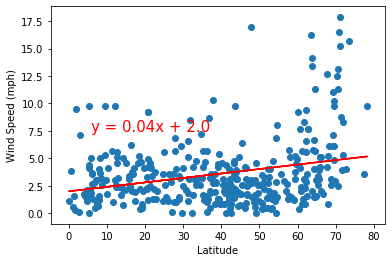

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])
regress_values_n = northern_hemisphere_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northern_hemisphere_df["Lat"],regress_values_n, "r")
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Wind Speed"])
plt.annotate(line_eq,(6,7.5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.18125799237553464


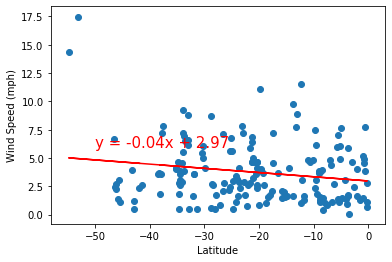

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])
regress_values_s = southern_hemisphere_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(southern_hemisphere_df["Lat"],regress_values_s, "r")
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Wind Speed"])
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-value is: {rvalue}")
plt.show()